# Employee Attrition Analysis


## Context



Employee attrition is a significant concern for organizations. By analyzing employee-related data, we can gain insights into the factors influencing attrition and develop strategies to improve employee retention. In this notebook, we will explore various aspects of employee attrition and build a predictive model.

The objective of this project is to develop a predictive model that accurately predicts employee attrition in an organization based on various employee-related features. By analyzing the dataset and identifying the key factors contributing to employee attrition, the goal is to create a model that can assist in identifying employees at risk of leaving. This will enable organizations to take proactive measures to improve employee satisfaction, engagement, and retention, leading to a more stable and productive workforce.


### What is Employee Attrition?

Employee Attrition describes an unanticipated attrition of the workforce. The causes of this decline are all unavoidable reasons such as retirement, resignation, employee loss of work capacity or sudden death. Companies with high workforce attrition rates often face the risk of abusing internal resources.

Realizing, there are many different reasons for the high labor force attrition rate in enterprises. Eg:

- Working conditions are not guaranteed.
- Salary is too low.
- The job does not match your interests.
- There is no future for career development.
- Unable to balance work and life.
- Lack of proper recognition and appreciation for employees from managers.

Workforce attrition rate is an important indicator in human resource management, which can indicate outstanding issues that need to be addressed. A low engagement rate shows that the company is on the right track. On the contrary, a high attrition rate is something no company wants.


## Data set review

**Method of collection:**

This is a fictional data set created by IBM data scientists. Tries to uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. More details [here](https://zenodo.org/record/4088439#.Y9Y3rtJBwUE)

**License:**

- C0 1.0 Universal (CC0 1.0) - Public Domain Dedication
   
- No Copyright - You may copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

This dataset contains 35 attributes as follows:

|STT | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Age | Employee's age |
| 2 | Gender | Employee's Gender |
| 3 | BusinessTravel | Frequency of employees' business trips |
| 4 | DailyRate | Daily salary rate for employees |
| 5 | Department | Office of employees |
| 6 | DistanceFromHome | Distance from home in miles to work |
| 7 | Education | Level of education achieved by staff |
| 8 | EducationField | Employee's field of study |
| 9 | EmployeeCount | Total number of employees in the organization |
| 10 | EmployeeNumber | A unique identifier for each employee record |
| 11 | EnvironmentSatisfaction | Employee satisfaction with their working environment |
| 12 | HourlyRate | Hourly rate for employees |
| 13 | JobInvolvement | Level of involvement required for the employee's job |
| 14 | JobLevel | Employee's level of work |
| 15 | JobRole | The role of employees in the organization |
| 16 | JobSatisfaction | Employee satisfaction with their work |
| 17 | MaritalStatus | Employee's marital status |
| 18 | MonthlyIncome | Employee's monthly income |
| 19 | MonthlyRate | Monthly salary rate for employees |
| 20 | NumCompaniesWorked | Number of companies the employee worked for |
| 21 | Over18 | Whether the employee is over 18 years old |
| 22 | OverTime | Do employees work overtime |
| 23 | PercentSalaryHike | Salary increase rate for employees |
| 24 | PerformanceRating | The performance rating of the employee |
| 25 | RelationshipSatisfaction | Employee satisfaction with their relationships |
| 26 | StandardHours | Standard working hours for employees |
| 27 | StockOptionLevel | Employee stock option level |
| 28 | TotalWorkingYears | Total number of years the employee has worked |
| 29 | TrainingTimesLastYear | Number of times employees were taken to training in the last year |
| 30 | WorkLifeBalance | Employees' perception of their work-life balance |
| 31 | YearsAtCompany | Number of years employees have been with the company |
| 32 | YearsInCurrentRole | Number of years the employee has been in their current role |
| 33 | YearsSinceLastPromotion | Number of years since employee's last promotion |
| 34 | YearsWithCurrManager | Number of years an employee has been with their current manager |
| 35 | Attrition | Does the employee leave the organization |



As earlier stated, the goal of this project is to:

- Explore and discover the factors and relationships that affect employee attrition.
- Build a Model based on this dataset that will predict employee attritio.

## Exploratory Data Analysis

### Import necessary libraries 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score, auc,roc_curve, roc_auc_score, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

In [2]:
%matplotlib inline
sns.set()

### Import and Load the dataset

In [3]:
df = pd.read_csv("data\HR_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### What can we deduce about the data

First, let's summarize our data by row, column, features, unique, and missing values,

In [4]:
print("Rows : " ,df.shape[0])
print("Columns : " ,df.shape[1])
print("\nFeatures : \n" ,df.columns.tolist())
print("\nUnique values : \n",df.nunique())
print("\nMissing values : ", df.isnull().sum().values.sum())


Rows :  1470
Columns :  35

Features : 
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Unique values : 
 Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber          

Let's explore some other details like the datatype of each feature, summary statistics for numerical columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


At this point, we observe that:

- There are 1470 rows and 35 columns in the dataset.
- There are no missing values. 
- Employee Number is Unique for every employees. This feature will be removed as it may cause bias in model building.
- EmplyeeCount, Over18, StandardHours are low cardinality features and will also be removed. They have a single value each.
- Categorical data in the dataset are of the object datatype and will need to be transformed.

### Let's Explore Visually

To view correlation between values

<AxesSubplot: >

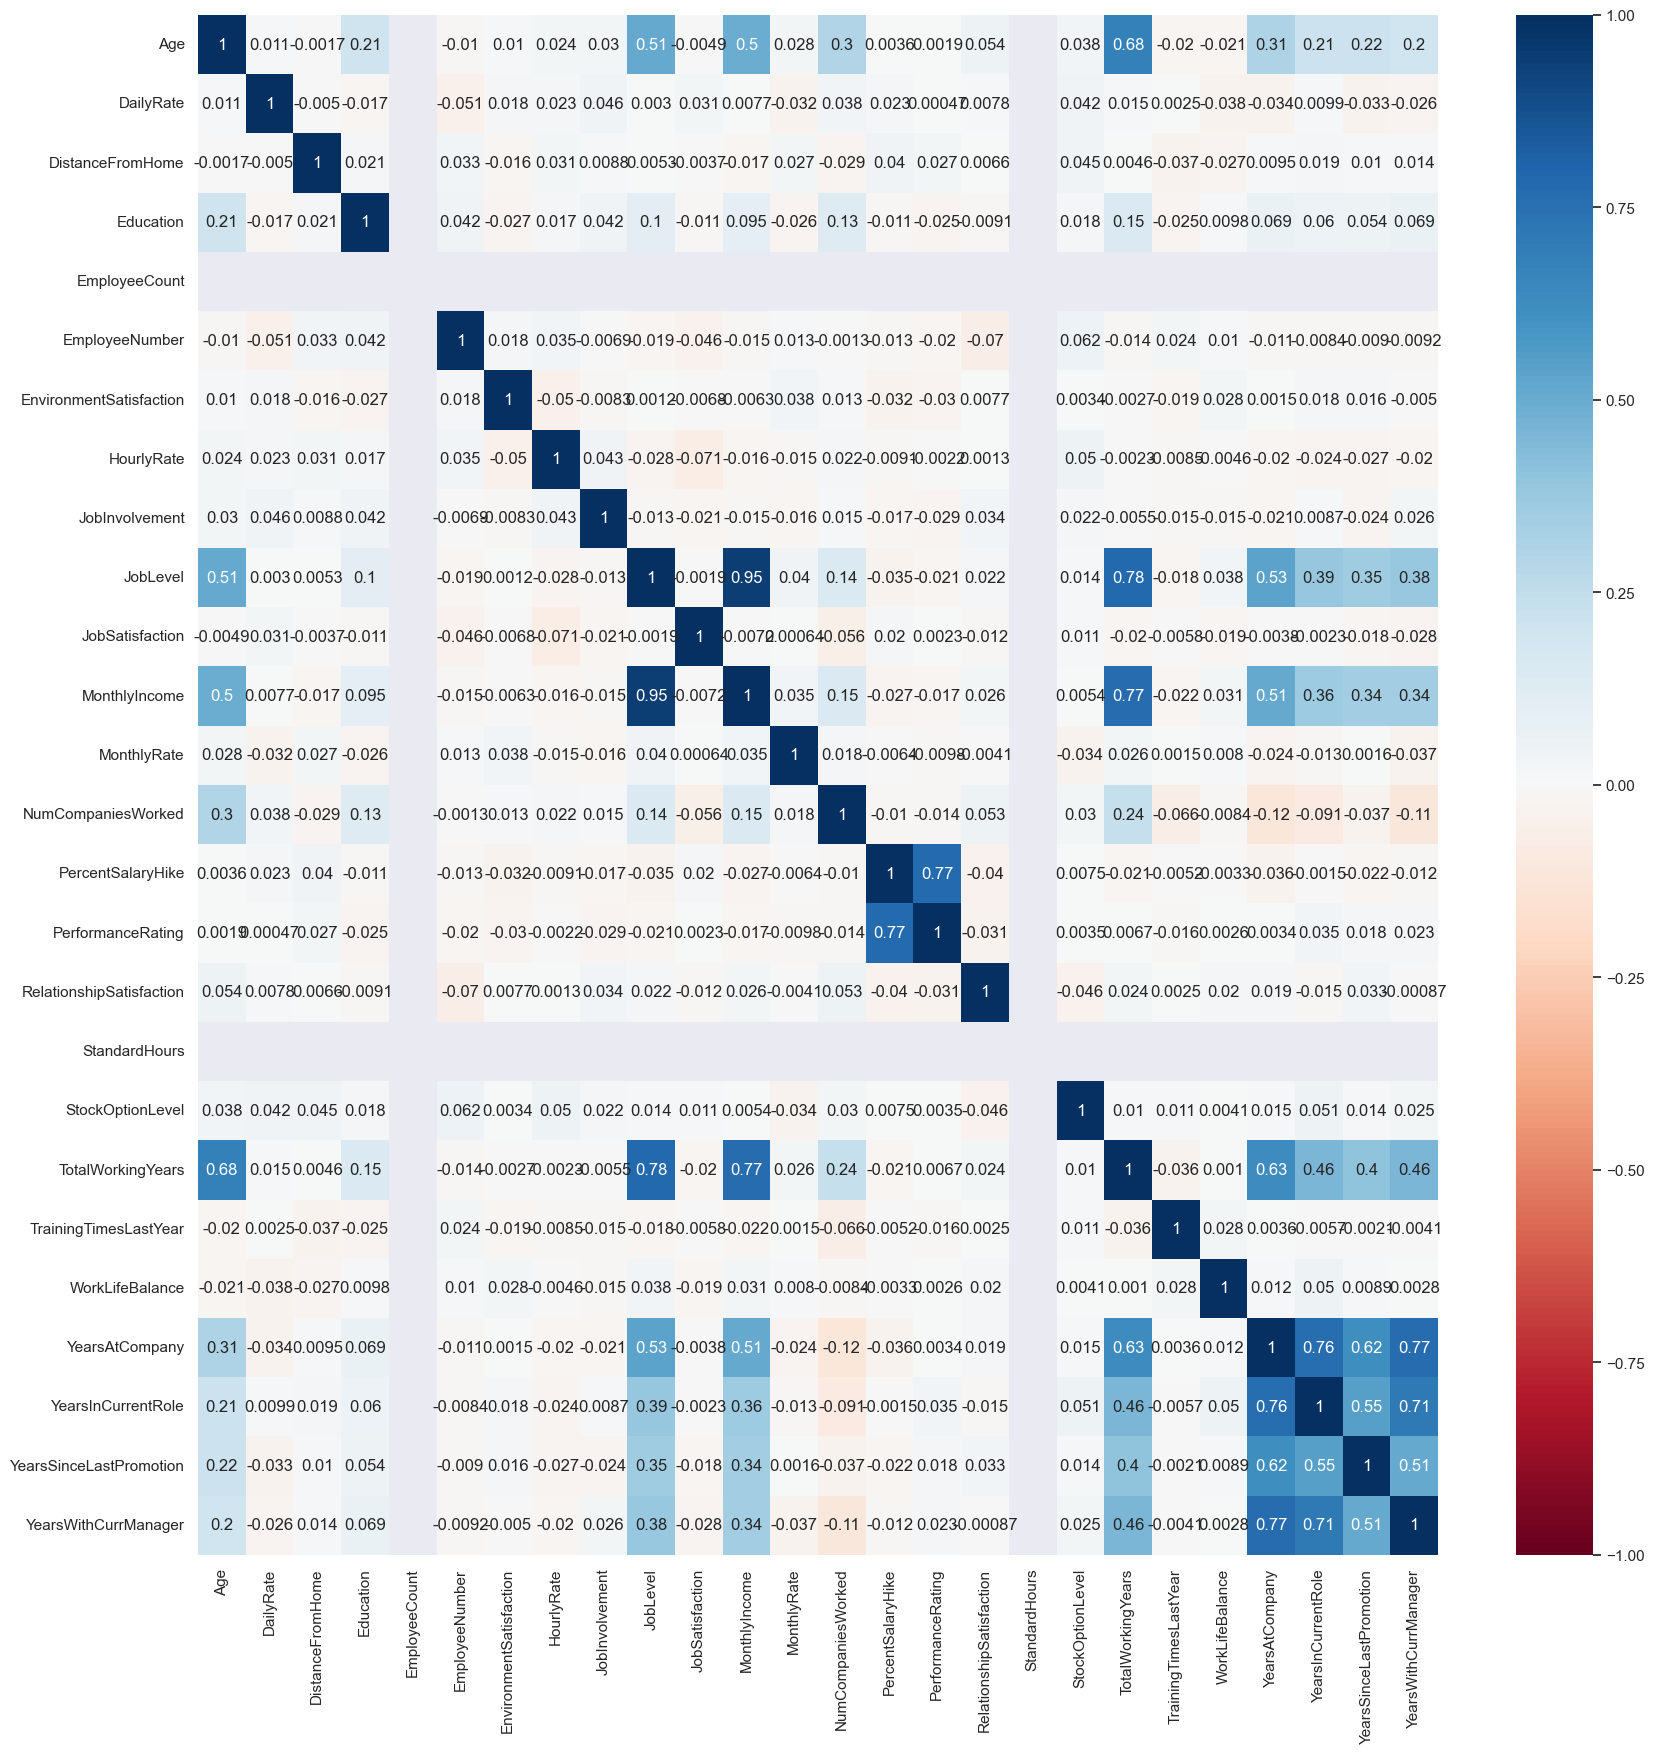

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True)

We see from this graph that there is a strong correlation between the Job Level and Monthly Income.

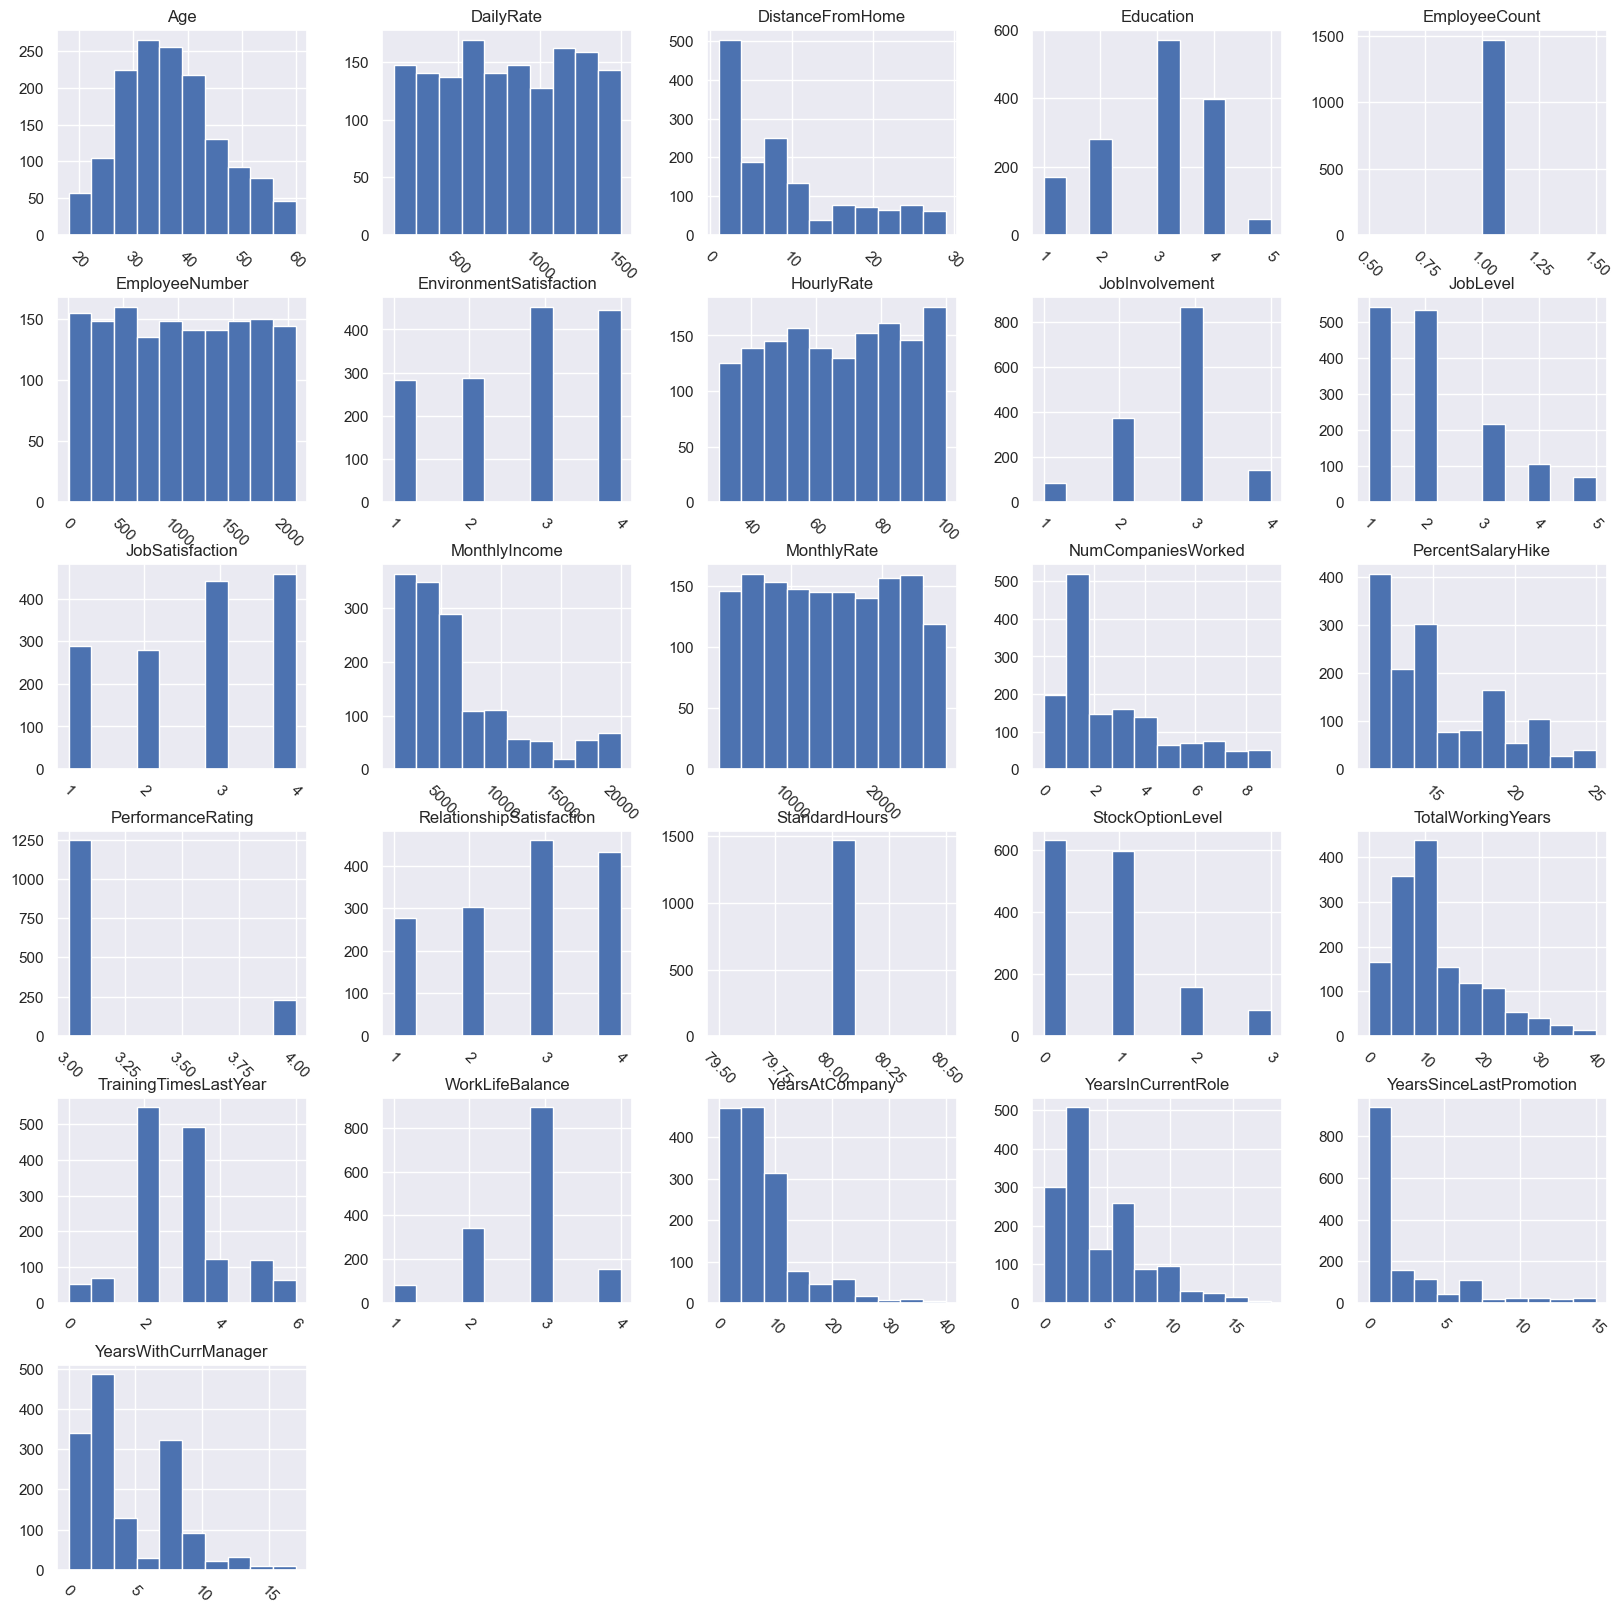

In [52]:
df.hist(figsize=(20, 20), xrot=-45)
plt.show()


### 1. What is the distribution of age among the employees in the organization?

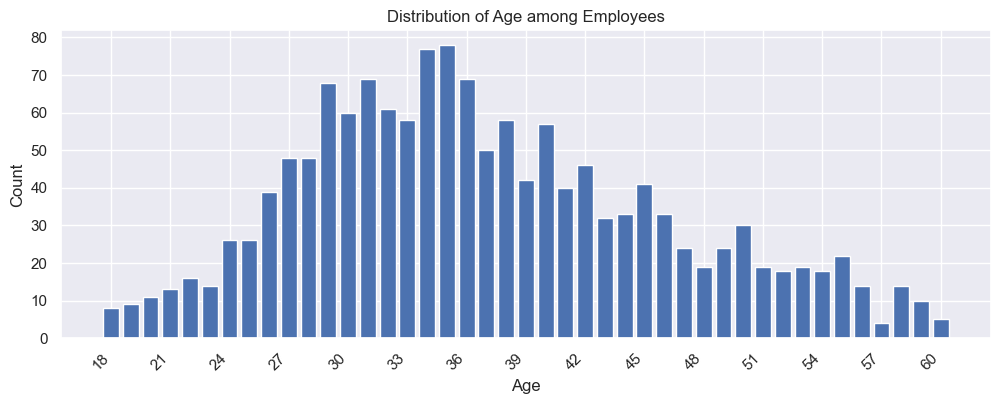

In [8]:
min_age = df['Age'].min()
max_age = df['Age'].max()
min_age, max_age
# Define the number of bins and calculate the bin width
num_bins = 10
bin_width = (max_age - min_age) / num_bins

ages = df['Age']

# Calculate the count of each age
unique_ages, counts = np.unique(ages, return_counts=True)

# Plotting the counts per age
plt.figure(figsize=(12,4))
plt.bar(unique_ages, counts)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age among Employees')

# Set x-ticks for every age in the range 18 to 60
plt.xticks(range(18, 61,3), rotation= 45, ha='right')

plt.show()

**Observation:**
- From age 18 to 29, there is an increase in the number of employees increase in age.
- Ages between 29 to around age 40 form the core of the organization with the highest number of employees per age.
- From Age 42 onwards, there is a general decline in number of employees with increase in age.

### 2. Is there a significant difference in attrition rates between male and female employees?

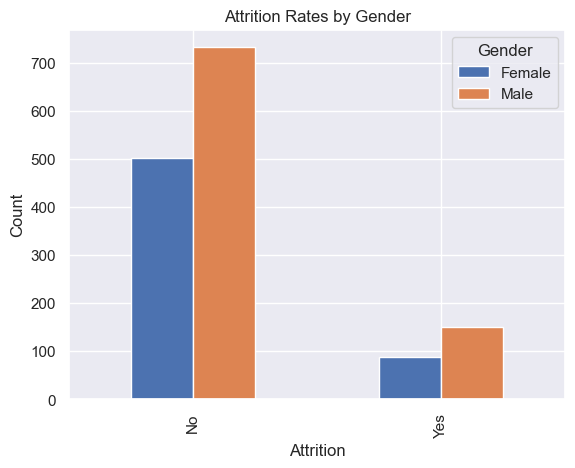

In [9]:
# Create a contingency table of attrition and gender
contingency_table = pd.crosstab(df['Attrition'], df['Gender'])

# Plot the bar chart
contingency_table.plot(kind='bar')

# Set the plot labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Rates by Gender')

# Show the plot
plt.show()

**Observation:**
- Based on the bar chart, there is no clear indication that the gender affects attrition

#### Perform Chi-square Test


**<i>H<sub>o</sub></i>** : There is no association between gender and attrition  
**<i>H<sub>o</sub></i>** : There is an association between gender and attrition  
**$\alpha$** = 0.05

In [10]:
# Perform the chi-square test
chi2, p_value, _, _ = st.chi2_contingency(contingency_table, correction=False)

# Print the chi-square test statistic and p-value
print(f"Chi-square test statistic: {chi2:4f}")
print(f"p-value: {p_value:4f}")

Chi-square test statistic: 1.275216
p-value: 0.258790


**Conclusion:**
- The p-value of 0.258 is greater than 0.05, hence we fail to reject the null hypothesis that the 2 variables are independent and conclude that there is no systemic association between the gender and attrition


### 3. How does the distance from home to the office impact employee attrition?

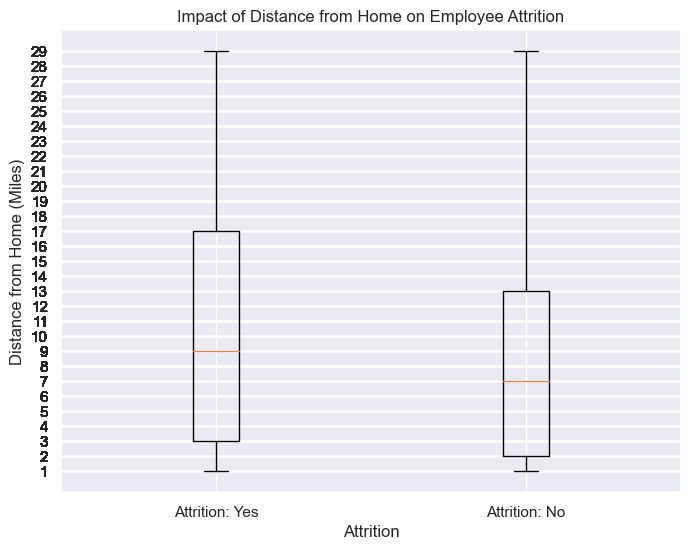

In [11]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Attrition'] == 'Yes']['DistanceFromHome'], df[df['Attrition'] == 'No']['DistanceFromHome']], labels=['Attrition: Yes', 'Attrition: No'])
plt.xlabel('Attrition')
plt.ylabel('Distance from Home (Miles)')
plt.title('Impact of Distance from Home on Employee Attrition')
plt.yticks(df['DistanceFromHome'], df['DistanceFromHome'])
plt.show()

**Observation:**
- There is a slight difference in the mean distance from home for the difference attrition outcomes, with YES having 9 and NO 7
- Both groups have a minimum distance value of 1 mile and a maximum value of 29 miles
- The first quartile values have only one mile separating them with YES at 3 and NO at 2
- There is a huge difference in the third quartile with YES at 17 and NO 13

#### Perform T-Test

We perform a T-Test for YES and NO groupings to check for a difference in the distance from   
    **<i>H<sub>o</sub></i>** : There is no difference in distance from home for the difference attrition outcomes  
    **<i>H<sub>a</sub></i>** : There is a difference in distance from home for the difference attrition outcomes  
    **$\alpha$** = 0.05

In [12]:
# Subset the data for each group
attrition_yes = df[df['Attrition'] == 'Yes']['DistanceFromHome']
attrition_no = df[df['Attrition'] == 'No']['DistanceFromHome']

# Perform the t-test
t_stat, p_value = st.ttest_ind(attrition_yes, attrition_no, equal_var=False) ## equal_var = False due to data imbalance

# Print the t-statistic and p-value
print(f"T-Statistic: {t_stat:4f}")
print(f"P-Value: {p_value:4f}")

T-Statistic: 2.888183
P-Value: 0.004137


**Conclusion:**
- A p_value of 0.004137 is less than 0.05, thus we reject the null hypothesis and accept the alternate hypothesis
- Hence, there is a difference in distance from home for the difference attrition outcomes

**<i>H<sub>o</sub></i>** : There is no connection between the distance from home and the attrition outcome  
**<i>H<sub>a</sub></i>** : There is a connection between the distance from home and the attrition outcome   
**$\alpha$** = 0.05

In [13]:
# Set the random seed for reproducibility
np.random.seed(42)

# Determine the size of the downsampled attrition_yes array
downsample_size = len(attrition_yes)

# Randomly select observations from attrition_yes to create the downsampled array
downsampled_attrition_no = np.random.choice(attrition_no, size=downsample_size, replace=False)

# Perform the statistical tests or analysis using the downsampled arrays
correlation, p_value = st.pearsonr(downsampled_attrition_no, attrition_yes)

# Print the correlation coefficient and p-value
print(f"Correlation Coefficient: {correlation:4f}")
print(f"P-Value: {p_value:4f}")

Correlation Coefficient: -0.081399
P-Value: 0.211822


**Conclusion:**
- A p-value of 0.211, greater than 0.05, means that we fail to reject our null hypothesis and conclude that there is not enough evidence to conclude a significant correlation between attrition and distance from home.
- The correlation coefficient of -0.081399 indicates a weak negative correlation, but it is not statistically significant.
- Based on the previous t-test, we identify the presence of a relationship thought the pearson correlation test concludes that this relationship is not statistically significant

**Potential Bias issue:**

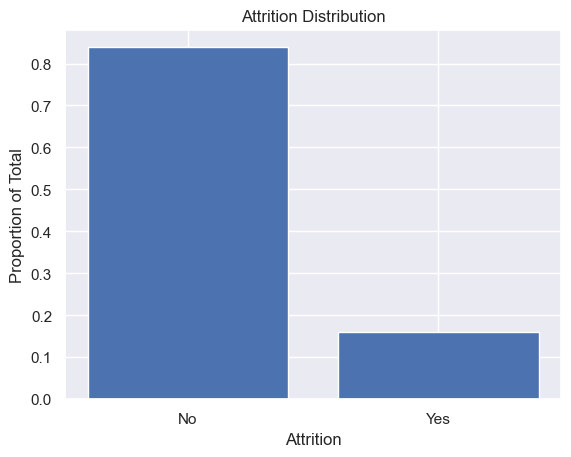

In [14]:
attrition_counts = df['Attrition'].value_counts(normalize=True)

# Create a bar chart
plt.bar(attrition_counts.index, attrition_counts.values)

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Proportion of Total')
plt.title('Attrition Distribution')

# Display the plot
plt.show()


- Due to the large imbalance in the two classes in the Attrition variable, The Majority Class was downsampled during calculation of Pearson Correlation.
- Please note that downsampling the data may introduce some uncertainty and potential loss of information due to the reduced sample size. It is important to interpret the results with caution and consider the limitations of downsampling on the analysis.

### 4. What is the relationship between education level and job level within the organization?

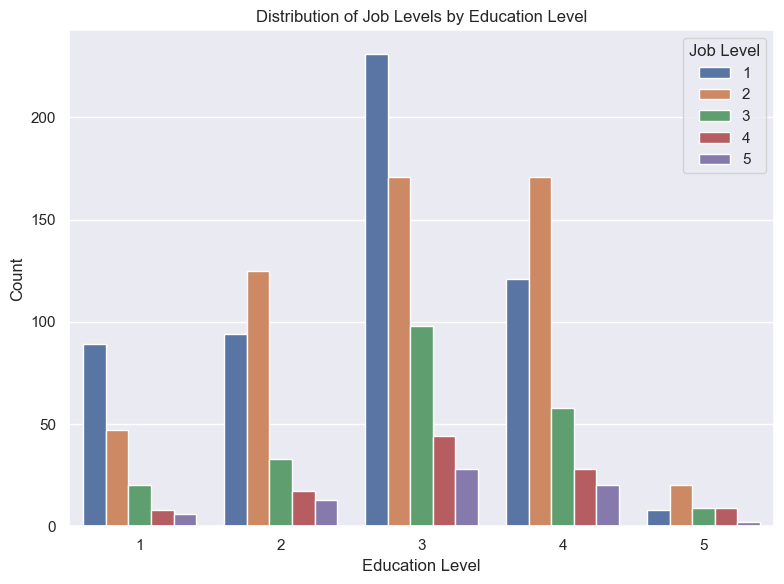

In [15]:
# Create a stacked bar plot
plt.figure(figsize=(8, 6))
sns.countplot(df, x='Education', hue='JobLevel')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Job Levels by Education Level')
plt.legend(title='Job Level')
plt.tight_layout()
plt.show()

**Observation:**
- Education level 3 is has the most employees in the various job levels in the company
- Education level 6 has the least employees in the various levels in the company
- Further analysis is required to identify the possible relationship between the two variables

#### Perform Chi-square Test and Cramér's V statistic
**<i>H<sub>o</sub></i>** : There is no association between job level and education  
**<i>H<sub>o</sub></i>** : There is an association between job level and education  
**$\alpha$** = 0.05

In [16]:
# Create a contingency table of education level and job level
contingency_table = pd.crosstab(df['Education'], df['JobLevel'])

# Perform the chi-square test
chi2, p_value, _, _ = st.chi2_contingency(contingency_table)

# Calculate the Cramér's V statistic
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramer_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

# Print the test results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Cramér's V statistic: {cramer_v:}")

Chi-square statistic: 61.17582022468589
P-value: 3.3127738726606886e-07
Cramér's V statistic: 0.10200025028704611


**Conclusion:**
- The p-value of 3.313e-07 indicates strong evidence against the null hypothesis of independence. Hence we reject the null hypothesis and accept the alternate hypothesis
- Based on the Cramér's V statistic of 0.102 and the chi-square statistic of 61.176, there is a statistically significant association between education level and job level within the organization.
- The Cramér's V statistic measures the strength of association between categorical variables, while the chi-square statistic tests the independence of these variables. In this case, both statistics suggest that there is a significant relationship between education level and job level.
- The small effect size (Cramér's V = 0.102) indicates a weak practical significance of the association. However, the statistical significance (p-value < 0.05) suggests that the association is unlikely to be due to chance alone.

### 5. Is there a correlation between job satisfaction and monthly income?

#### Perform Pearson Correlation Test
**<i>H<sub>o</sub></i>** : There is no connection between job satisfaction and monthly income  
**<i>H<sub>a</sub></i>** : There is a connection between job satisfaction and monthly income  
**$\alpha$** = 0.05

In [17]:
job_satisfaction = df['JobSatisfaction']
monthly_income = df['MonthlyIncome']

# Calculate correlation coefficient and p-value
correlation, p_value = st.pearsonr(job_satisfaction, monthly_income)

# Print the results
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

Correlation Coefficient: -0.0072
P-Value: 0.7840


**Conclusion:**
- The p-value of 0.7840 is greater than the alpha value, 0.05.
- Hence, we fail to reject the null hypothesis and conclude that there is no statistically significant relationship between job satisfaction and monthly income.
- The correlation coefficient being close to zero suggests a very weak correlation between job satisfaction and monthly income. However, it is not statistically significant

### 6. Does the number of companies previously worked for have an effect on attrition rates?

#### Perform Chi-square Test and Cramér's V statistic
**<i>H<sub>o</sub></i>** : There is no association between the number of companies previously worked for and attrition   
**<i>H<sub>o</sub></i>** : There is an association between the number of companies previously worked for and attrition  
**$\alpha$** = 0.05

In [18]:
# Create a contingency table
contingency_table = pd.crosstab(df['Attrition'], df['NumCompaniesWorked'])

# Perform the chi-square test
chi2, p_value, _, _ = st.chi2_contingency(contingency_table)

# Calculate the Cramér's V statistic
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramer_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

# Print the chi-square statistic and p-value
print(f"Chi-square test statistic: {chi2:4f}")
print(f"p-value: {p_value:4f}")
print(f"Cramér's V statistic: {cramer_v:}")

Chi-square test statistic: 25.744404
p-value: 0.002249
Cramér's V statistic: 0.1323374485313073


**Conclusion:**
- The p-value of 0.002249(less than 0.05) indicates that the observed relationship between the number of companies previously worked for and attrition rates is statistically significant. In other words, the likelihood of observing such an association by chance alone is very low. 
- Therefore, we can reject the null hypothesis that there is no association between these variables.
- The Cramér's value suggests a moderate level of association between the variables.

## Feature Engineering

**What Are Our Data Quality Issues?**

1. **Data Quality Issue #1**:  
> **Unnecessary Columns**:
We've identified four columns that could create bias in our model. This columns should be dropped.
2. **Data Quality Issue #2**: 
> **Categorical DataType**: Categorical columns are of the object datatype. We will use Ordinal Encoding to convert this columns to a form that will serve the model better
3. **Data Quality Issue #3**: 
> **Standardization**: The dataset will be standardize to a mean of zero


### **Data Quality Issue #1:**
**Unnecessary columns**

In [43]:
drop_columns = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
model_df = df.copy()
model_df = model_df.drop(drop_columns, axis=1)


### **Data Quality Issue #2:**
**Categorical Data**

In [44]:
#Encode the target column Attrition such that Yes is 1 and No is 0
model_df['Attrition'] = np.where(model_df['Attrition'] == 'Yes', 1, 0)

shuffle_df = shuffle(model_df, random_state=42)

#split the dataset
x, y = shuffle_df.drop('Attrition', axis=1), shuffle_df['Attrition']
y = y.ravel()
encoder = OrdinalEncoder()
s = (x.dtypes=='object')
object_cols = list(s[s].index)
x[object_cols] = encoder.fit_transform(x[object_cols])

### **Data Quality Issue #3:**
**Standardization**

In [45]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

## Model Builing

### Train Test Split

In [46]:
# Split the dataset into train and test sets, maintaining the class distribution
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Feature Importance

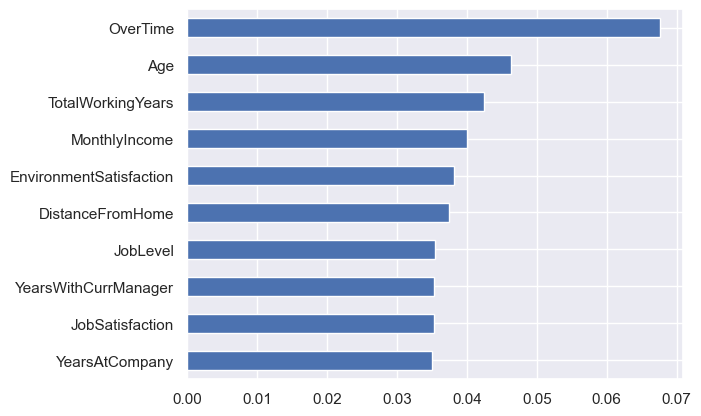

In [47]:
model = ExtraTreesClassifier()
model.fit(x, y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

From the graph above, we see that the three most important feature in predicting employee attrition are OverTime, Age and Monthly Income

### Model Selection

In [48]:
clf = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()),
    XGBClassifier(),
    KNeighborsClassifier(),
    LGBMClassifier(),
    LogisticRegression()
    
]

In [49]:
clf_columns = []
clf_compare = pd.DataFrame(columns=clf_columns)

row_index = 0

for alg in clf:
    pred = alg.fit(X_train, y_train).predict(X_test)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name;
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4);
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4);
    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)  
clf_compare

,Classifier,Train Accuracy,Test Accuracy
0,AdaBoostClassifier,0.8988,0.8946
8,LogisticRegression,0.8741,0.8912
4,CalibratedClassifierCV,0.8707,0.8878
7,LGBMClassifier,1.0000,0.8741
2,RandomForestClassifier,0.9991,0.8673
5,XGBClassifier,1.0000,0.8639
1,BaggingClassifier,0.9847,0.8503
6,KNeighborsClassifier,0.8724,0.8503
3,GaussianNB,0.7662,0.7925


From our comparison, AdaBoost Classifier gives the best prediction accuracy. 

### Hyperparameter Tuning

In [53]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

# Create an AdaBoostClassifier object
clf = AdaBoostClassifier()

# Create a GridSearchCV object
grid = GridSearchCV(clf, params, cv=10)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'learning_rate': 0.2, 'n_estimators': 100}


In [54]:
y_pred = grid.predict(X_test)
print(f"Parameterized model accuracy: {accuracy_score(y_test, y_pred)}")

Parameterized model accuracy: 0.8775510204081632


### Dumping Model for deployment

In [55]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(grid, pickle_out)